<!--  Header einfügen -->
<img style="width:80%;" id="image" src="iu.jpg">

# Einfuerung in Python - IU - WS 2023/24
<img style="width:40%;" id="image" src="python.png">

                                                               andreas.huemmer.ext@iu.org



## Hausaufgabe 05
Erreichbare Punktzahl: 10
Abgabedatum: 29.01.2024, 06:00

Füllen Sie folgende Felder aus:

Name:           Sascha Angermann

Matrikelnummer: 102205656

In [2]:
import os
import math
from time import time
# os.system('cmd command');
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

### Aufgabe 1 
(2 Punkte)

Werten Sie Wechselkurs Boersendaten aus.

Teilaufgabe:

a) Geben sie die erzeugten Dataframes aus. Extrahieren sie den Wechselkurs von Euro zu USD und von Euro zu Yen.

b) Berechnen Sie aus den gegebenen Daten im dfu-Dataframe den Wechselkurz zwischen Euro und Japanischem YEN (EUR/JPY)

c) Vergleichen Sie ihr Ergebnis mit dem direkten Wechselkurs zwischen EUR/JPY. Git es eine Abweichung? Berechnen Sie die 
Differenz und geben Sie diese aus.

In [3]:
# !pip install pandas_datareader

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

### ACHTUNG ###################################################################################
# Der API Key ist auf 25 Abfragen pro Tag begrenzt, bitte benutzen sie ihren eigenen API KEY:
# https://www.alphavantage.co/support/#api-key
###############################################################################################
key = '' # TODO: add your api key here
dfu = web.DataReader(["USD/EUR","USD/JPY"], "av-forex", api_key=key)
dfy = web.DataReader("EUR/JPY", "av-forex", api_key=key)


In [5]:
print(dfu)
print(dfy)

                                 USD/EUR               USD/JPY
From_Currency Code                   USD                   USD
From_Currency Name  United States Dollar  United States Dollar
To_Currency Code                     EUR                   JPY
To_Currency Name                    Euro          Japanese Yen
Exchange Rate                 0.95890000          155.50700000
Last Refreshed       2025-01-21 21:34:01   2025-01-21 21:34:01
Time Zone                            UTC                   UTC
Bid Price                     0.95889000          155.50290000
Ask Price                     0.95891000          155.50950000
                                EUR/JPY
From_Currency Code                  EUR
From_Currency Name                 Euro
To_Currency Code                    JPY
To_Currency Name           Japanese Yen
Exchange Rate              162.12400000
Last Refreshed      2025-01-21 21:34:02
Time Zone                           UTC
Bid Price                  162.12230000
Ask Price 

In [6]:
# Gegeben 100€...wieviel Yen bekommen Sie für diesen Betrag?

geld_in_eur = 100
eur_to_yen = float(dfy['EUR/JPY']['Exchange Rate'])
geld_in_yen = geld_in_eur * eur_to_yen
print(f'{geld_in_eur}€ = {geld_in_yen}¥')

# a)
print('a)')
eur_to_usd = 1 / float(dfu['USD/EUR']['Exchange Rate'])
print('Euro zu USD:', eur_to_usd)
print('Euro zu Yen:', eur_to_yen)

# b)
print('b)')
eur_to_yen_2 = float(dfu['USD/JPY']['Exchange Rate']) / float(dfu['USD/EUR']['Exchange Rate'])
print('Euro zu Yen:', eur_to_yen_2)

# c)
print('c)')
print('Differenz bei Berechnung Euro zu Yen (\'a)\' - \'b)\'):', eur_to_yen_2 - eur_to_yen)



100€ = 16212.4¥
a)
Euro zu USD: 1.0428616122640526
Euro zu Yen: 162.124
b)
Euro zu Yen: 162.17228073834602
c)
Differenz bei Berechnung Euro zu Yen ('a)' - 'b)'): 0.048280738346022645


Erreichte Punkte:  ___ / 2

---

### Aufgabe 2 
(2 Punkte)

Wir laden eine Zeitreihe mit Börsendaten (Kursdaten von Amazon).

Plotten Sie den jeweiligen Schlusskurs des Börsentages (close).
Was war der Höchst- und was der Tiefstwert der Aktie? Was war die größte Veränderung des Schluskurses von einem auf den anderen Tag?
Plotten Sie die Minima, Maxima und die größte Veränderung zwischen zwei Schlusskursen als horizontale bzw. vertikale Linie in den Plot der Zeitserie.


In [7]:
import requests
import json

symbol   = "AMZN"
url      = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + symbol + '&apikey=key'
# url      = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=key'
r        = requests.get(url)

In [8]:
stockdata     = r.json()
print(json.dumps(stockdata, indent=4))

{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AMZN",
        "3. Last Refreshed": "2025-01-21",
        "4. Output Size": "Compact",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2025-01-21": {
            "1. open": "228.9600",
            "2. high": "231.7800",
            "3. low": "226.9600",
            "4. close": "230.7100",
            "5. volume": "39297521"
        },
        "2025-01-17": {
            "1. open": "225.8400",
            "2. high": "226.5100",
            "3. low": "223.0800",
            "4. close": "225.9400",
            "5. volume": "42370123"
        },
        "2025-01-16": {
            "1. open": "224.4200",
            "2. high": "224.6500",
            "3. low": "220.3100",
            "4. close": "220.6600",
            "5. volume": "24757276"
        },
        "2025-01-15": {
            "1. open": "222.8300",
            "2. high": "22

In [9]:
### Ihr code hier ###
date = [keys for keys in stockdata['Time Series (Daily)'].keys()]
closevalue = [float(value['4. close']) for value in stockdata['Time Series (Daily)'].values()]
print(date)
print(closevalue)

['2025-01-21', '2025-01-17', '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13', '2025-01-10', '2025-01-08', '2025-01-07', '2025-01-06', '2025-01-03', '2025-01-02', '2024-12-31', '2024-12-30', '2024-12-27', '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20', '2024-12-19', '2024-12-18', '2024-12-17', '2024-12-16', '2024-12-13', '2024-12-12', '2024-12-11', '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04', '2024-12-03', '2024-12-02', '2024-11-29', '2024-11-27', '2024-11-26', '2024-11-25', '2024-11-22', '2024-11-21', '2024-11-20', '2024-11-19', '2024-11-18', '2024-11-15', '2024-11-14', '2024-11-13', '2024-11-12', '2024-11-11', '2024-11-08', '2024-11-07', '2024-11-06', '2024-11-05', '2024-11-04', '2024-11-01', '2024-10-31', '2024-10-30', '2024-10-29', '2024-10-28', '2024-10-25', '2024-10-24', '2024-10-23', '2024-10-22', '2024-10-21', '2024-10-18', '2024-10-17', '2024-10-16', '2024-10-15', '2024-10-14', '2024-10-11', '2024-10-10', '2024-10-09', '2024-10-08', '2024

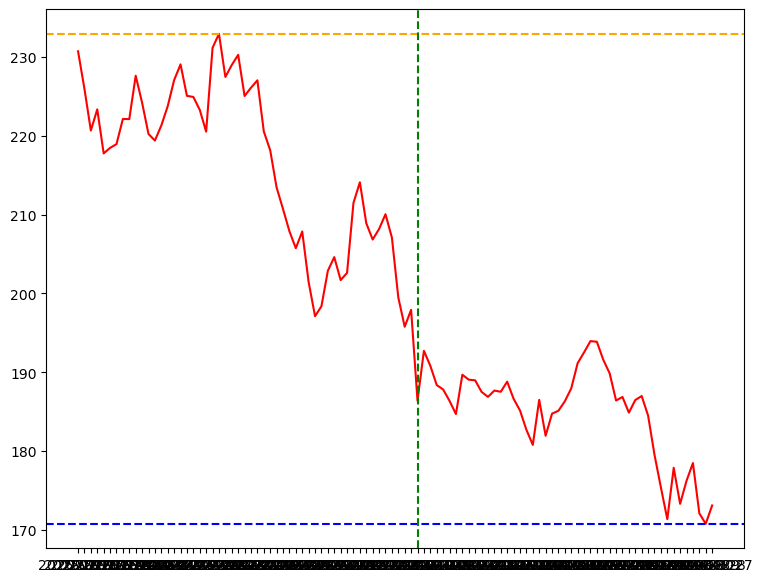

In [10]:
fig,ax = plt.subplots(1,figsize=(9,7))

ax.plot(date, closevalue, color="red", label=symbol)

def groesste_veraenderung_index(data):
    groesste_veraenderung = 0
    last_val = None
    index = None
    for i in range(len(data)):
        val = data[i]
        if last_val is None:
            last_val = val
            continue
        veraenderung = abs(last_val - val)
        if veraenderung > groesste_veraenderung:
            groesste_veraenderung = veraenderung
            index = i
        last_val = val
    return index

hoechstwert = max(closevalue)
tiefstwert = min(closevalue)
gr_ver_index = groesste_veraenderung_index(data=closevalue)

plt.axhline(y = hoechstwert, color = 'orange', linestyle = '--') 
plt.axhline(y = tiefstwert, color = 'blue', linestyle = '--') 
plt.axvline(x = gr_ver_index, color = 'green', linestyle = '--') 

plt.show()

Erreichte Punkte:  ___ / 2

---

### Aufgabe 3 
(2 Punkte)

#### Auswertung statistischer Daten
Wir laden ein Datenset von Eurostat mit einer Zeitreihe der monatilichen Inflationsdaten der Mitgliedsstaaten.

    https://ec.europa.eu/eurostat/databrowser/view/PRC_HICP_MANR__custom_3761882/bookmark/table?lang=en&bookmarkId=4ad27e6f-358a-4a3d-82a0-587d69a833eb
    
Extrahieren Sie aus diesem Datensatz die Zeitreihen für Östreich, Schweiz und Deutschland. (Overall index excluding administered prices) https://www.investopedia.com/terms/a/administered-price.asp

    https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
    
Stellen Sie diese Zeitreihen in einen Plot dar.

In [11]:
# !pip install eurostat

import eurostat

In [12]:
data = eurostat.get_data_df('prc_hicp_manr')

In [13]:
data

,freq,unit,coicop,geo\TIME_PERIOD,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,M,RCH_A,AP,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,5.4,5.4,5.7,5.8,5.6,4.9,4.8,4.5,4.6
1,M,RCH_A,AP,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,3.6,3.7,3.6,3.5,3.4,3.3,3.0,2.9,2.9
2,M,RCH_A,AP,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,4.6,5.2,5.1,4.0,3.7,3.2,3.8,3.2,3.4
3,M,RCH_A,AP,CH,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,1.1,1.2,1.2,1.2,1.2,1.1,1.1,1.1,0.9
4,M,RCH_A,AP,CY,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.9,2.8,2.1,4.5,0.2,0.6,0.4,-1.3,0.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,M,RCH_A,TOT_X_TBC,SI,NaN,NaN,NaN,NaN,NaN,NaN,...,3.3,2.8,2.4,1.5,1.2,1.0,0.5,-0.2,1.5,1.9
17705,M,RCH_A,TOT_X_TBC,SK,5.8,6.0,6.3,6.4,6.0,6.1,...,2.5,2.2,2.5,2.3,2.8,3.1,2.8,3.4,3.5,3.1
17706,M,RCH_A,TOT_X_TBC,TR,76.6,78.5,78.8,75.7,76.1,76.1,...,68.7,69.5,75.1,71.7,61.9,51.7,49.4,48.6,47.5,44.6
17707,M,RCH_A,TOT_X_TBC,UK,1.9,1.7,1.4,1.3,1.3,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
### Ihr code hier ###
# extraktion der datensetze 
y = data.loc[data['geo\\TIME_PERIOD'].isin(['AT', 'CH', 'DE'])].drop(['freq', 'unit', 'coicop', 'geo\\TIME_PERIOD'], axis=1)
x = y.columns.tolist()
print(x)
print(y)


['1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07'

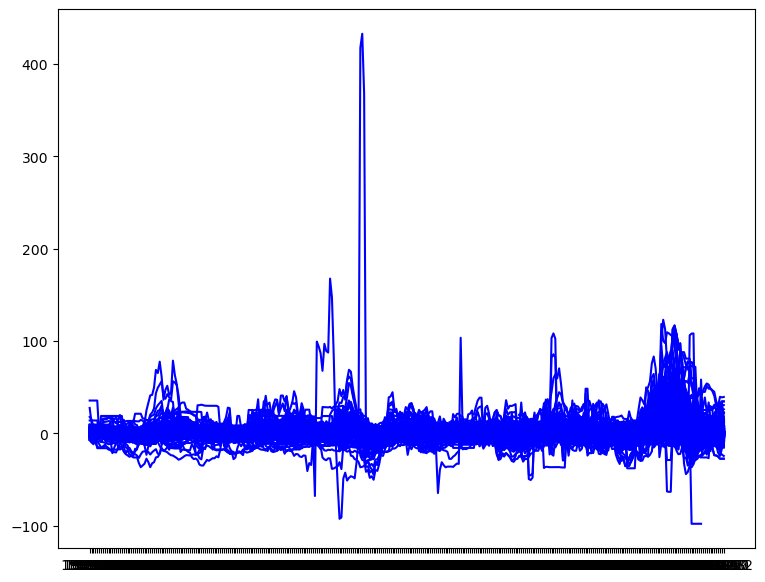

In [15]:
### Ihr  code hier ###
fig,ax = plt.subplots(1,figsize=(9,7))

for index, row in y.iterrows():
    ax.plot(x, row, color='blue')


plt.show()

Erreichte Punkte:  ___ / 2

---

### Aufgabe 4 
(3 Punkte)

#### Minst Datensatz und CNN

Der Einführungs-/Erklärteil für den MINST Datensatz ist aus https://inf-schule.de/ki/menueansicht/maschinelles_lernen_mit_python/deep_learning/ziffernerkennung/mnist_daten entnommen.

Weitere Informationen und Quellen finden Sie unter https://de.wikipedia.org/wiki/MNIST-Datenbank

In [16]:
# CSV-Datei öffnen und Inhalte in eine Liste laden
data_file = open("mnist_train_100.csv", 'r')
data_lines = data_file.readlines()
data_file.close()

In [17]:
# Anzahl der Einträge checken
len(data_lines)

100

In [18]:
# Ein Bild näher betrachten
pic_nr = 7

# Eintrag des Datensatzes ansehen
print( data_lines[pic_nr] )
print ( type(data_lines[pic_nr]) )

3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,252

#### Daten Analysieren

In [19]:
#String in Liste umwandeln
pic_values = data_lines[pic_nr].split(',')
print( pic_values )

print( len(pic_values ) )
print( 28*28 )

['3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '38', '43', '105', '255', '253', '253', '253', '253', '253', '174', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '43', '139', '224', '226', '252', '253', '252', '252', '252', '252', '252', '252', '158', '

Der erste Eintrag von den 785 ist das Label des Bildes, d. h. er sagt welche Zahl dort abgebildet ist. Unser Bild soll also eine handschriftliche 3 zeigen.

Die weiteren 784 Werte stellen das Bild dar. Um zu sehen, wie das funktioniert, müssen wir die Daten aber noch etwas weiter verarbeiten. Es gilt , d. h. wir können die Zahlen in einer 28x28 - Matrix darstellen.
Eine Matrix kann man in Python am besten mit der numpy Bibliothek erzeugen. Den ersten Zahlenwert wollen wir nicht mit einbeziehen und betrachten deshalb pic_values[1:] und stellen die restlichen 784 Zahlenwerten als 28x28-Matrix dar. 

In [20]:
# Daten des ersten Datensatzes nehmen, als 28x28-Array umformtieren und plotten
# asfarray: Konvertiert den Input zu einem Array, wobei der Typ float verwendet wird,
# dieser Typ wird im Folgenden benötigt, um die Werte mit matplotlib.imshow zu plotten
pic_array = np.asarray(pic_values[1:], dtype='float').reshape((28,28)) 

# ASCII-Ausgabe der Bilddaten
for z in range(28):
    for s in range(28):
        # Ausgabe der Werte mit 3 Stellen, rechtsbündig
        print (str(int(pic_array[z][s])).rjust(3), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252  59   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 252 252 252  59   0 

#### Daten als Bild darstellen

Jetzt wollen wir die Daten aber auch noch als Bild darstellen. Dafür gibt es den imshow Befehl aus der Bibliothek matplotlib. Durch den Parameter cmap = 'Greys' werden die Zahlen aus dem Array als Grauwerte interpretiert, wobei der Wert 0 ein weißes Pixel erzeugt, der Wert 255 ein schwarzes Pixel und die Werte dazwischen verschieden Abstufungen von grauen Pixeln.

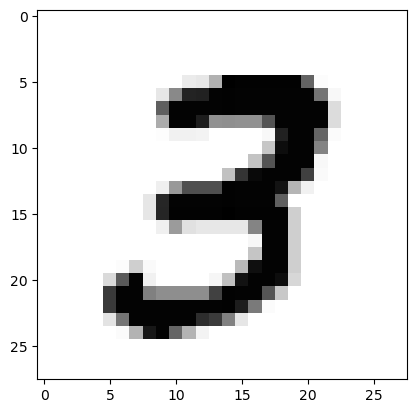

In [21]:
imshow(pic_array, cmap='Greys');

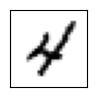

In [22]:
# eine andrere Ziffer
pic_nr=9
pic_values = data_lines[pic_nr].split(',')
pic_array = np.asarray(pic_values[1:], dtype='float').reshape((28,28))
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(pic_array, cmap='Greys')

In [23]:
# data_line ist eine Zeile aus dem Datensatz,
# also ein String der Länge 1+28x28 = 1+784
def plot_pic(data_line):
    pic_values = data_line.split(',')
    image = np.asarray(pic_values[1:], dtype='float').reshape((28,28))
    fig, axes = plt.subplots(figsize=(1,1))
    axes.matshow(image, cmap=plt.cm.binary)
    axes.set_xticks([])
    axes.set_yticks([])
    plt.show()

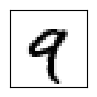

In [24]:
plot_pic(data_lines[4])

In [25]:
# data_lines ist eine Liste von Zeilen aus dem Datensatz,
# also eine Liste von Strings der Länge 1+28x28 = 1+784
def plot_pics(data_lines):
    images=[]
    for i in range(len(data_lines)):
        pics_values = data_lines[i].split(',')
        images.append(np.asarray(pics_values[1:], dtype='float').reshape((28,28)))
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

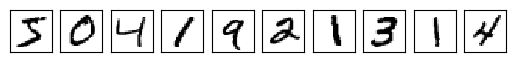

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [26]:
plot_pics(data_lines[0:10])
print( [int(data_lines[i][0]) for i in range(10)] )

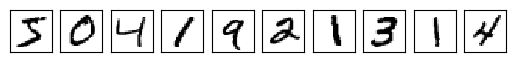

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


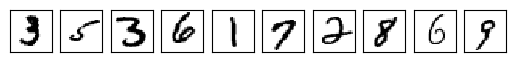

[3, 5, 3, 6, 1, 7, 2, 8, 6, 9]


In [27]:
for i in range(2):
    plot_pics(data_lines[i*10:(i+1)*10])
    print( [int(data_lines[i*10+j][0]) for j in range(10)] )

#### Erzeugen einer Matrix von Bildern¶

Manchmal ist es nützlich, die Bilder platzsparend in einer Matrix darzustellen. Deshalb schauen wir uns auc hnoch eine Möglichkeite an, wie man dies tun kann.

# Erzeugt eine 10x10-Matrix der ersten 100 Bilder des Triainingssatzes:
def plot_pics(data_lines):
    images=[]
    for i in range(len(data_lines)):
        pics_values = data_lines[i].split(',')
        images.append(np.asfarray(pics_values[1:]).reshape((28,28)))
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(5, 5))
    for i in range(10):
        for j in range(10):
            axes[i,j].matshow(images[i*10+j], cmap = plt.cm.binary)
            axes[i, j].axis('off')
    plt.show()

In [28]:
plot_pics(data_lines[0:100])

now on with the show...

bitte Sicherstellen dass Ihre Pythonversion mit Ihrerr Tensorflow Bibliothek spielt. Hier getestet mit Python 3.8. Falls Ihre Version nicht mit den aktuellen Bibliotheken spielt, muessen Sie ein entsprechendes vEnv mit z.B. Python 3.8 anlegen.

In [29]:
import sys
sys.version

'3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]'

In [30]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [31]:
# MNIST-Datensatz laden
def load_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
    
    # Daten normalisieren (Pixelwerte von 0-255 auf 0-1 skalieren)
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Die Daten in ein Format bringen, das CNN erwartet (Batch, Height, Width, Channels)
    train_images = train_images[..., tf.newaxis]
    test_images = test_images[..., tf.newaxis]

    return train_images, train_labels, test_images, test_labels

In [59]:
# CNN-Modell erstellen


def build_model():

    model = models.Sequential([
        layers.Conv2D(filters=8, kernel_size=(1, 1), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=10, activation='softmax'),
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model

In [33]:
# Modell trainieren

def train_model(model, train_images, train_labels, test_images, test_labels):

    history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))
    
    return history


In [34]:
# Ergebnisse visualisieren
def plot_results(history):
    plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
    plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
    plt.xlabel('Epoche')
    plt.ylabel('Genauigkeit')
    plt.legend()
    plt.show()

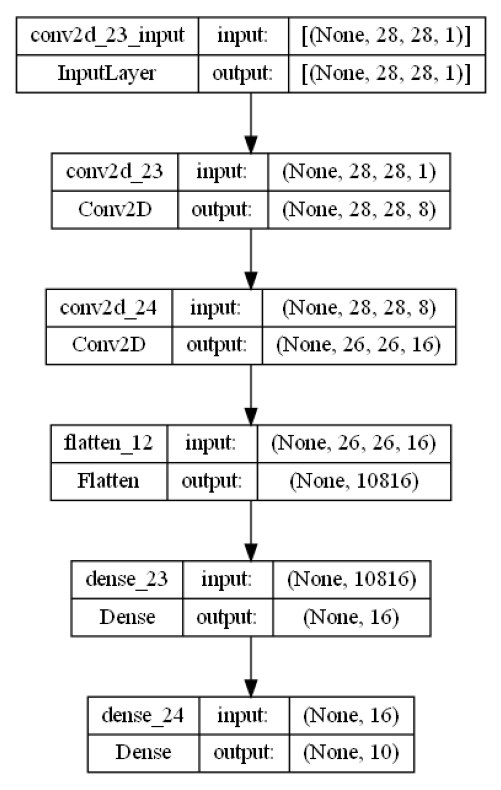

Epoch 1/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2360 - accuracy: 0.9312 - val_loss: 0.1045 - val_accuracy: 0.9683
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0831 - accuracy: 0.9754 - val_loss: 0.0816 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0747 - val_accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.0639 - val_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0685 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0728 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0

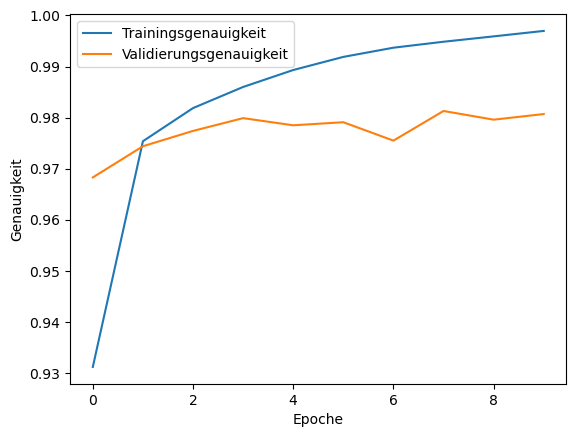

313/313 - 4s - loss: 0.0893 - accuracy: 0.9807 - 4s/epoch - 12ms/step

Testgenauigkeit: 0.9807
Das Modell wurde gespeichert.


In [60]:
# Hauptteil
# Daten laden
train_images, train_labels, test_images, test_labels = load_data()

# Modell erstellen
model = build_model()
    
# Modellgrafik erstellen und speichern
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Grafik anzeigen
img = plt.imread('model_structure.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# Modell trainieren
history = train_model(model, train_images, train_labels, test_images, test_labels)

# Ergebnisse visualisieren
plot_results(history)

# Modell bewerten
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTestgenauigkeit: {test_acc:.4f}")

# Modell speichern
model.save("mnist_cnn_model.h5")
print("Das Modell wurde gespeichert.")


Erreichte Punkte:  ___ / 3

---

**Gesamtpunktzahl:  ___ / 10**